# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

## Texas

In [2]:
data = xr.open_dataset('snr_data_utig_ais_with_inputs.nc')

In [3]:
texas_df = data.to_dataframe()

In [4]:
texas_df.columns

Index(['Unnamed: 0', 'snr', 'x', 'y', 'thickness', 'thickness_err', 'bm_mask',
       'surface', 'speed', 'speed_err', 't2m', 't2m_err'],
      dtype='object')

Some variables: 
- t2m is ERA5 2m temperature data
- speed is the magnitude of the velocity (log this)
- not sure what surface is, maybe elevation?

In [18]:
full_df = texas_df.loc[(~np.isnan(texas_df['snr'])) & 
                       (~np.isnan(texas_df['thickness'])) &
                       (~np.isnan(texas_df['speed'])) &
                       (~np.isnan(texas_df['t2m'])) &
                       (~np.isnan(texas_df['surface'])) &
                       (~np.isnan(texas_df['bm_mask']))
                       ]

In [19]:
full_df.columns

Index(['Unnamed: 0', 'snr', 'x', 'y', 'thickness', 'thickness_err', 'bm_mask',
       'surface', 'speed', 'speed_err', 't2m', 't2m_err'],
      dtype='object')

In [20]:
full_df['log_speed'] = np.log(full_df['speed'])

/tmp/ipykernel_284/395461927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['log_speed'] = np.log(full_df['speed'])


In [21]:
# full_df['exp_surface'] = np.exp(full_df['surface'])

In [22]:
full_df.columns

Index(['Unnamed: 0', 'snr', 'x', 'y', 'thickness', 'thickness_err', 'bm_mask',
       'surface', 'speed', 'speed_err', 't2m', 't2m_err', 'log_speed'],
      dtype='object')

In [23]:
full_df

Unnamed: 0      snr          x          y    thickness  \
index                                                              
0                  0 -110.080  -166210.0  -213190.0  1805.137573   
10                10  -83.566  -166150.0  -213380.0  1851.450195   
20                20 -105.900  -166100.0  -213570.0  1851.450195   
30                30  -89.619  -166040.0  -213750.0  1907.196533   
40                40  -71.907  -165980.0  -213940.0  1907.196533   
...              ...      ...        ...        ...          ...   
11997800    11997800  -70.337  2284700.0 -1004800.0  1744.009766   
11997810    11997810  -71.257  2284900.0 -1004900.0  1735.607056   
11997820    11997820  -74.409  2285100.0 -1005000.0  1735.607056   
11997830    11997830  -71.640  2285300.0 -1005200.0  1719.280884   
11997840    11997840  -80.367  2285500.0 -1005300.0  1733.048706   

          thickness_err  bm_mask      surface       speed  speed_err  \
index                                                                  
0                  30.0        2  2647.294678    9.451745   0.179147   
10                 30.0        2  2645.057129    9.451745   0.179147   
20                 30.0        2  2645.057129    9.573236   0.179191   
30                 30.0        2  2642.702637    9.573236   0.179191   
40                 30.0        2  2642.702637    9.688128   0.179320   
...                 ...      ...          ...         ...        ...   
11997800           57.0        2   267.058563  439.228394   3.119996   
11997810           32.0        2   259.668488  429.115326   2.836336   
11997820           32.0        2   259.668488  432.203613   2.852978   
11997830           36.0        2   258.314453  416.122192   2.912035   
11997840           76.0        2   251.813278  416.122192   2.912035   

                 t2m   t2m_err  log_speed  
index                                      
0         248.041946  0.022238   2.246199  
10        248.041946  0.022238   2.246199  
20        248.041946  0.022238   2.258971  
30        248.041946  0.022238   2.258971  
40        248.041946  0.022238   2.270901  
...              ...       ...        ...  
11997800  264.443115  0.027329   6.085020  
11997810  264.443115  0.027329   6.061726  
11997820  264.443115  0.027329   6.068897  
11997830  264.443115  0.027329   6.030979  
11997840  264.443115  0.027329   6.030979  

[1176330 rows x 13 columns]

In [24]:
test_df = full_df[~np.isinf(full_df['log_speed']) ]
                  # & ~np.isinf(full_df['exp_surface'])]

In [25]:
test_df

Unnamed: 0      snr          x          y    thickness  \
index                                                              
0                  0 -110.080  -166210.0  -213190.0  1805.137573   
10                10  -83.566  -166150.0  -213380.0  1851.450195   
20                20 -105.900  -166100.0  -213570.0  1851.450195   
30                30  -89.619  -166040.0  -213750.0  1907.196533   
40                40  -71.907  -165980.0  -213940.0  1907.196533   
...              ...      ...        ...        ...          ...   
11997800    11997800  -70.337  2284700.0 -1004800.0  1744.009766   
11997810    11997810  -71.257  2284900.0 -1004900.0  1735.607056   
11997820    11997820  -74.409  2285100.0 -1005000.0  1735.607056   
11997830    11997830  -71.640  2285300.0 -1005200.0  1719.280884   
11997840    11997840  -80.367  2285500.0 -1005300.0  1733.048706   

          thickness_err  bm_mask      surface       speed  speed_err  \
index                                                                  
0                  30.0        2  2647.294678    9.451745   0.179147   
10                 30.0        2  2645.057129    9.451745   0.179147   
20                 30.0        2  2645.057129    9.573236   0.179191   
30                 30.0        2  2642.702637    9.573236   0.179191   
40                 30.0        2  2642.702637    9.688128   0.179320   
...                 ...      ...          ...         ...        ...   
11997800           57.0        2   267.058563  439.228394   3.119996   
11997810           32.0        2   259.668488  429.115326   2.836336   
11997820           32.0        2   259.668488  432.203613   2.852978   
11997830           36.0        2   258.314453  416.122192   2.912035   
11997840           76.0        2   251.813278  416.122192   2.912035   

                 t2m   t2m_err  log_speed  
index                                      
0         248.041946  0.022238   2.246199  
10        248.041946  0.022238   2.246199  
20        248.041946  0.022238   2.258971  
30        248.041946  0.022238   2.258971  
40        248.041946  0.022238   2.270901  
...              ...       ...        ...  
11997800  264.443115  0.027329   6.085020  
11997810  264.443115  0.027329   6.061726  
11997820  264.443115  0.027329   6.068897  
11997830  264.443115  0.027329   6.030979  
11997840  264.443115  0.027329   6.030979  

[1176330 rows x 13 columns]

In [26]:
grounded_df = test_df.loc[test_df['bm_mask']==2]

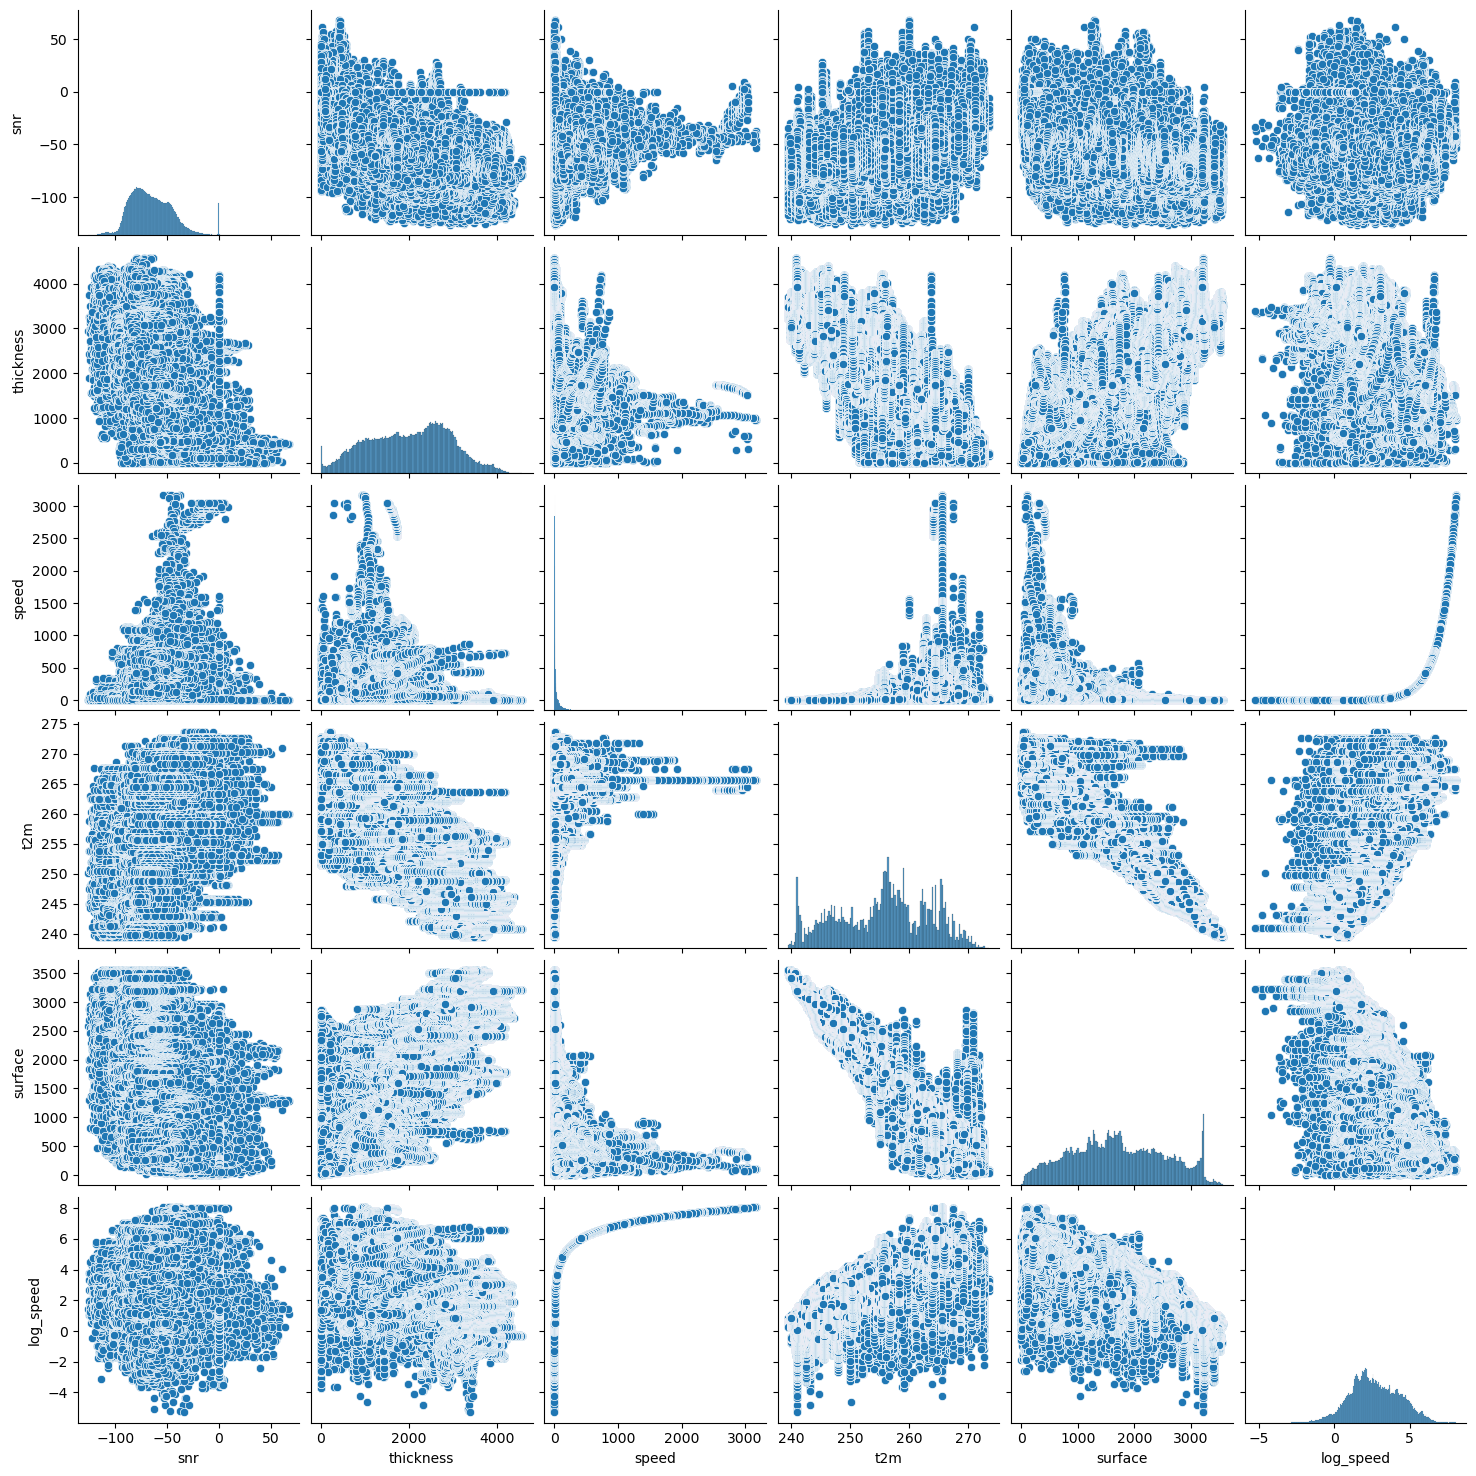

In [27]:
sns.pairplot(grounded_df[['snr', 'thickness', 'speed', 
                          't2m','surface', 'log_speed']])

n < 100 = 926743
n >= 100 = 144548


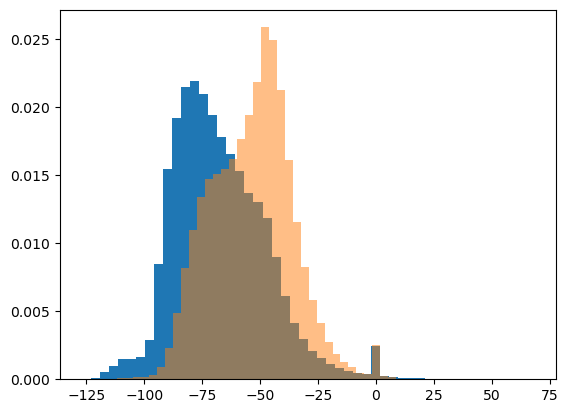

In [28]:
print(f"n < 100 = {len(grounded_df['snr'].loc[grounded_df['speed']<100])}")
print(f"n >= 100 = {len(grounded_df['snr'].loc[grounded_df['speed']>=100])}")
plt.hist(grounded_df['snr'].loc[grounded_df['speed']<100], density=True,
         bins=50)
plt.hist(grounded_df['snr'].loc[grounded_df['speed']>=100], density=True, 
         bins=50, alpha=0.5);

n < 100 = 811397
n >= 100 = 259894


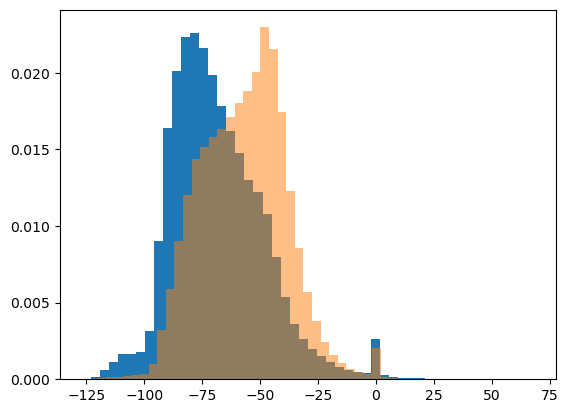

In [34]:
print(f"n < 50 = {len(grounded_df['snr'].loc[grounded_df['speed']<50])}")
print(f"n >= 50 = {len(grounded_df['snr'].loc[grounded_df['speed']>=50])}")
plt.hist(grounded_df['snr'].loc[grounded_df['speed']<50], density=True,
         bins=50)
plt.hist(grounded_df['snr'].loc[grounded_df['speed']>=50], density=True, 
         bins=50, alpha=0.5);

In [29]:
floating_df = test_df.loc[test_df['bm_mask']==3]

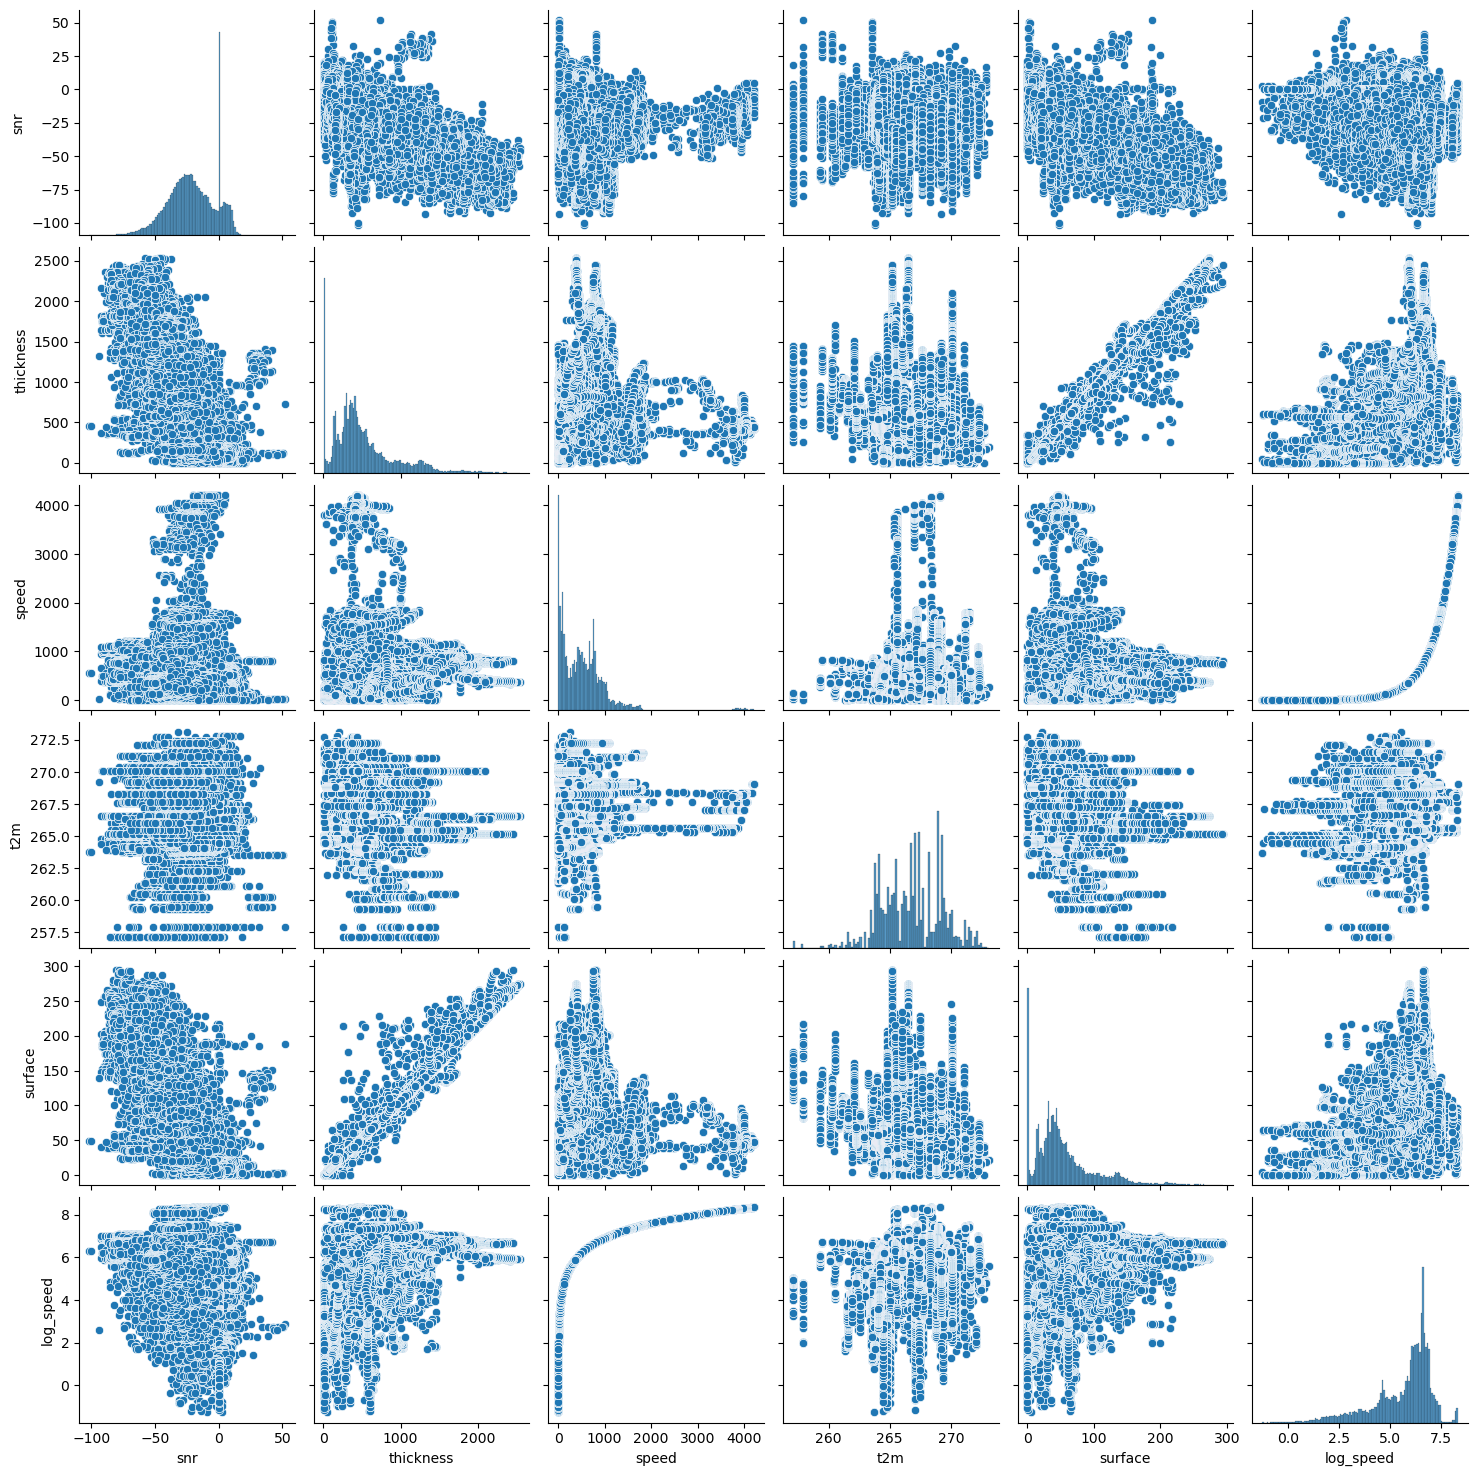

In [30]:
sns.pairplot(floating_df[['snr', 'thickness', 'speed', 
                          't2m','surface', 'log_speed']])

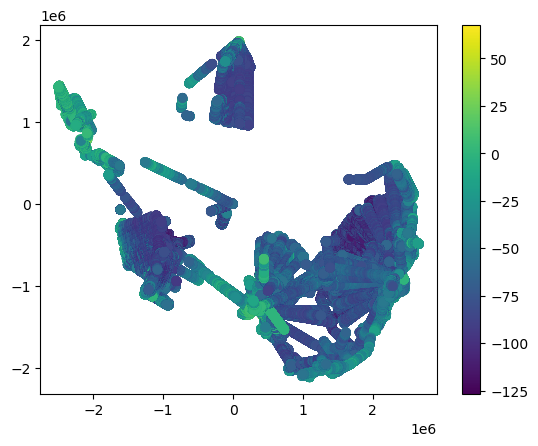

In [35]:
plt.scatter(test_df['x'], test_df['y'], c=test_df['snr'])
plt.colorbar()

Some potential things to add:
1. Surface elevation
2. Distance from grounding line (take bedmachine grid, preprocess the distance from the middle of a cell to the closest distance to floating)
3. Wilson's lakes gridded to a coarse grid of percentage water within a square

## CRESIS Antarctica

In [36]:
data = xr.open_dataset('snr_data_cresis_ais_with_inputs.nc')

In [37]:
cresis_df = data.to_dataframe()

In [38]:
cresis_df.columns

Index(['x', 'y', 'snr', 'source_csv_file', 'source_mat_file', 'source_dir',
       'thickness', 'thickness_err', 'bm_mask', 'surface', 'speed',
       'speed_err', 't2m', 't2m_err'],
      dtype='object')

In [39]:
texas_df.columns

Index(['Unnamed: 0', 'snr', 'x', 'y', 'thickness', 'thickness_err', 'bm_mask',
       'surface', 'speed', 'speed_err', 't2m', 't2m_err'],
      dtype='object')

In [40]:
full_df = cresis_df.loc[(~np.isnan(cresis_df['snr'])) & 
                        (~np.isnan(cresis_df['thickness'])) &
                        (~np.isnan(cresis_df['speed'])) &
                        (~np.isnan(cresis_df['t2m'])) &
                        (~np.isnan(cresis_df['surface'])) &
                        (~np.isnan(cresis_df['bm_mask']))
                       ]

In [42]:
full_df['log_speed'] = np.log(full_df['speed'])

/tmp/ipykernel_284/395461927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['log_speed'] = np.log(full_df['speed'])


In [43]:
test_df = full_df[~np.isinf(full_df['log_speed']) ]

In [44]:
grounded_df = full_df.loc[full_df['bm_mask']==2]

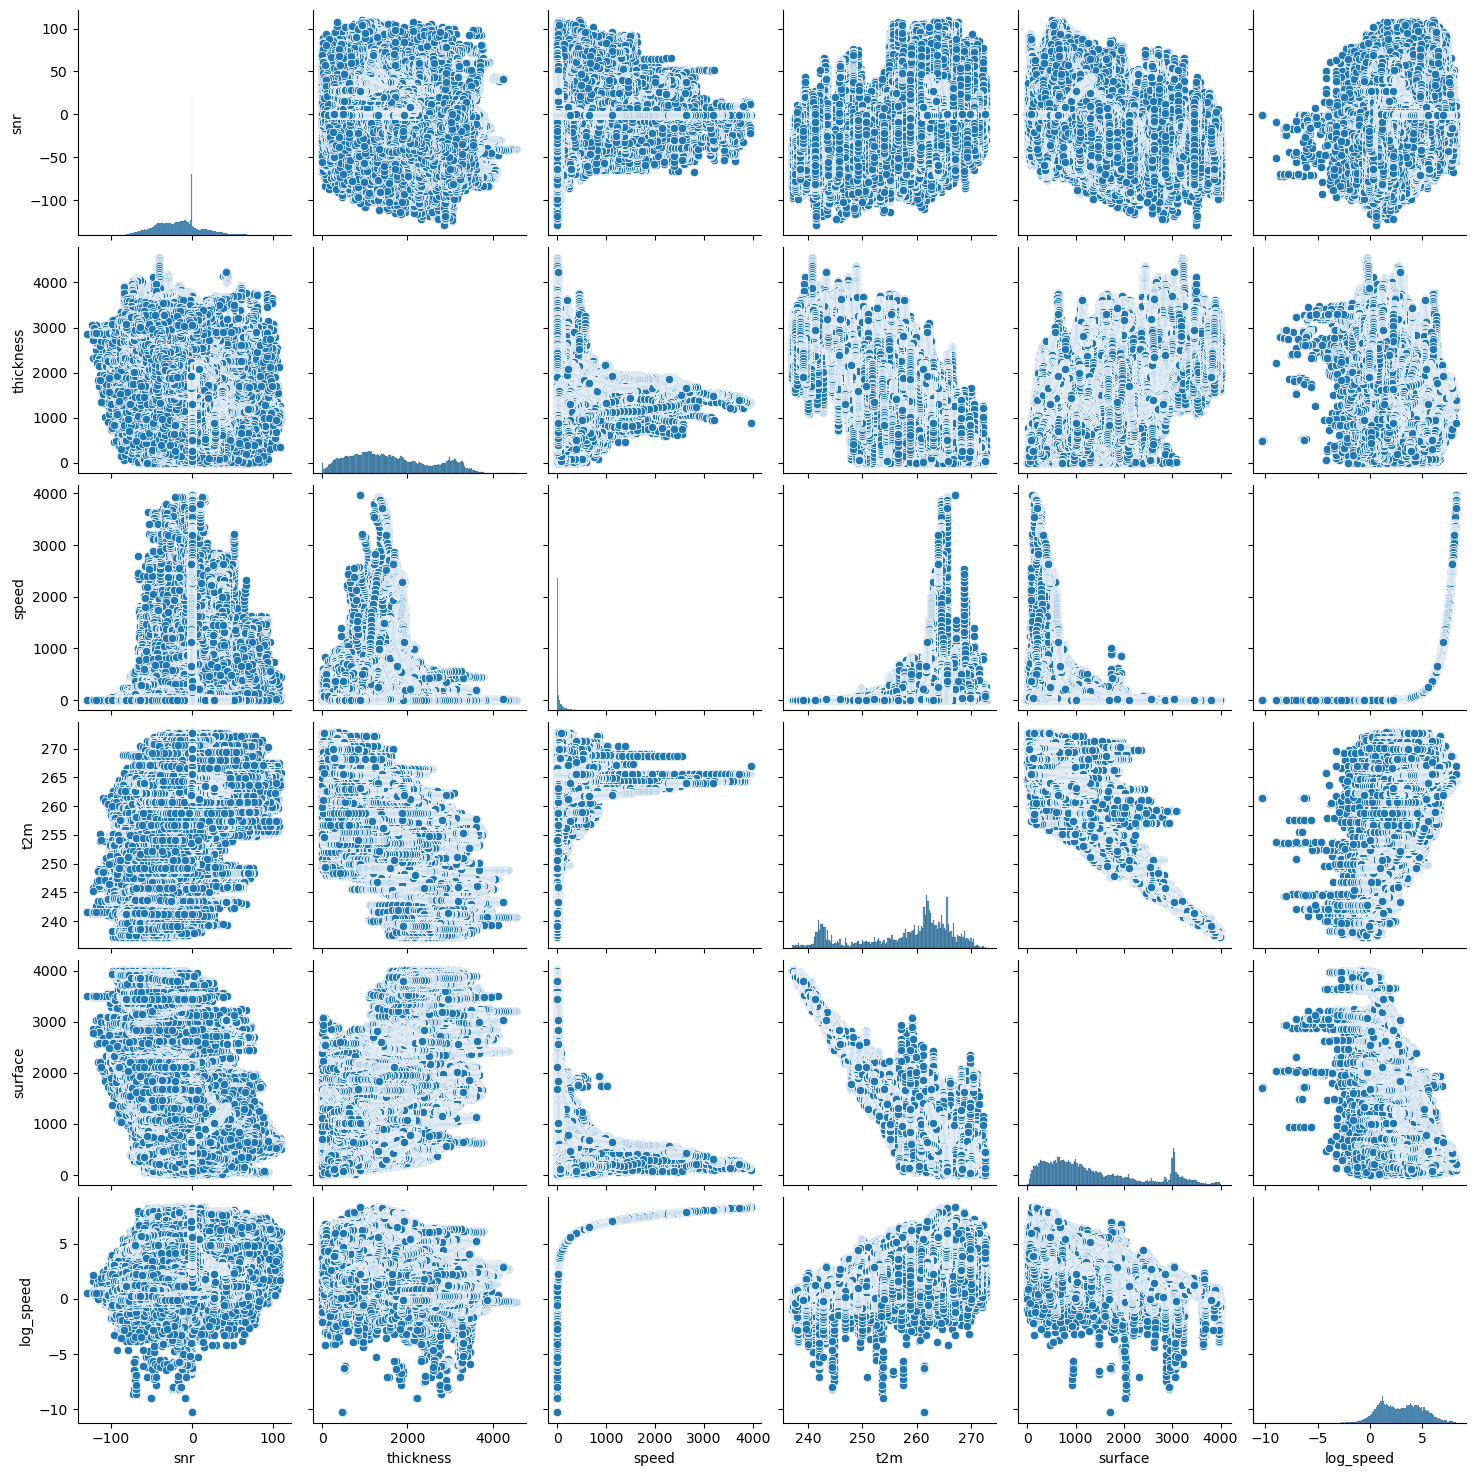

In [45]:
sns.pairplot(grounded_df[['snr', 'thickness', 'speed', 
                          't2m','surface', 'log_speed']])

In [46]:
floating_df = full_df.loc[full_df['bm_mask']==3]

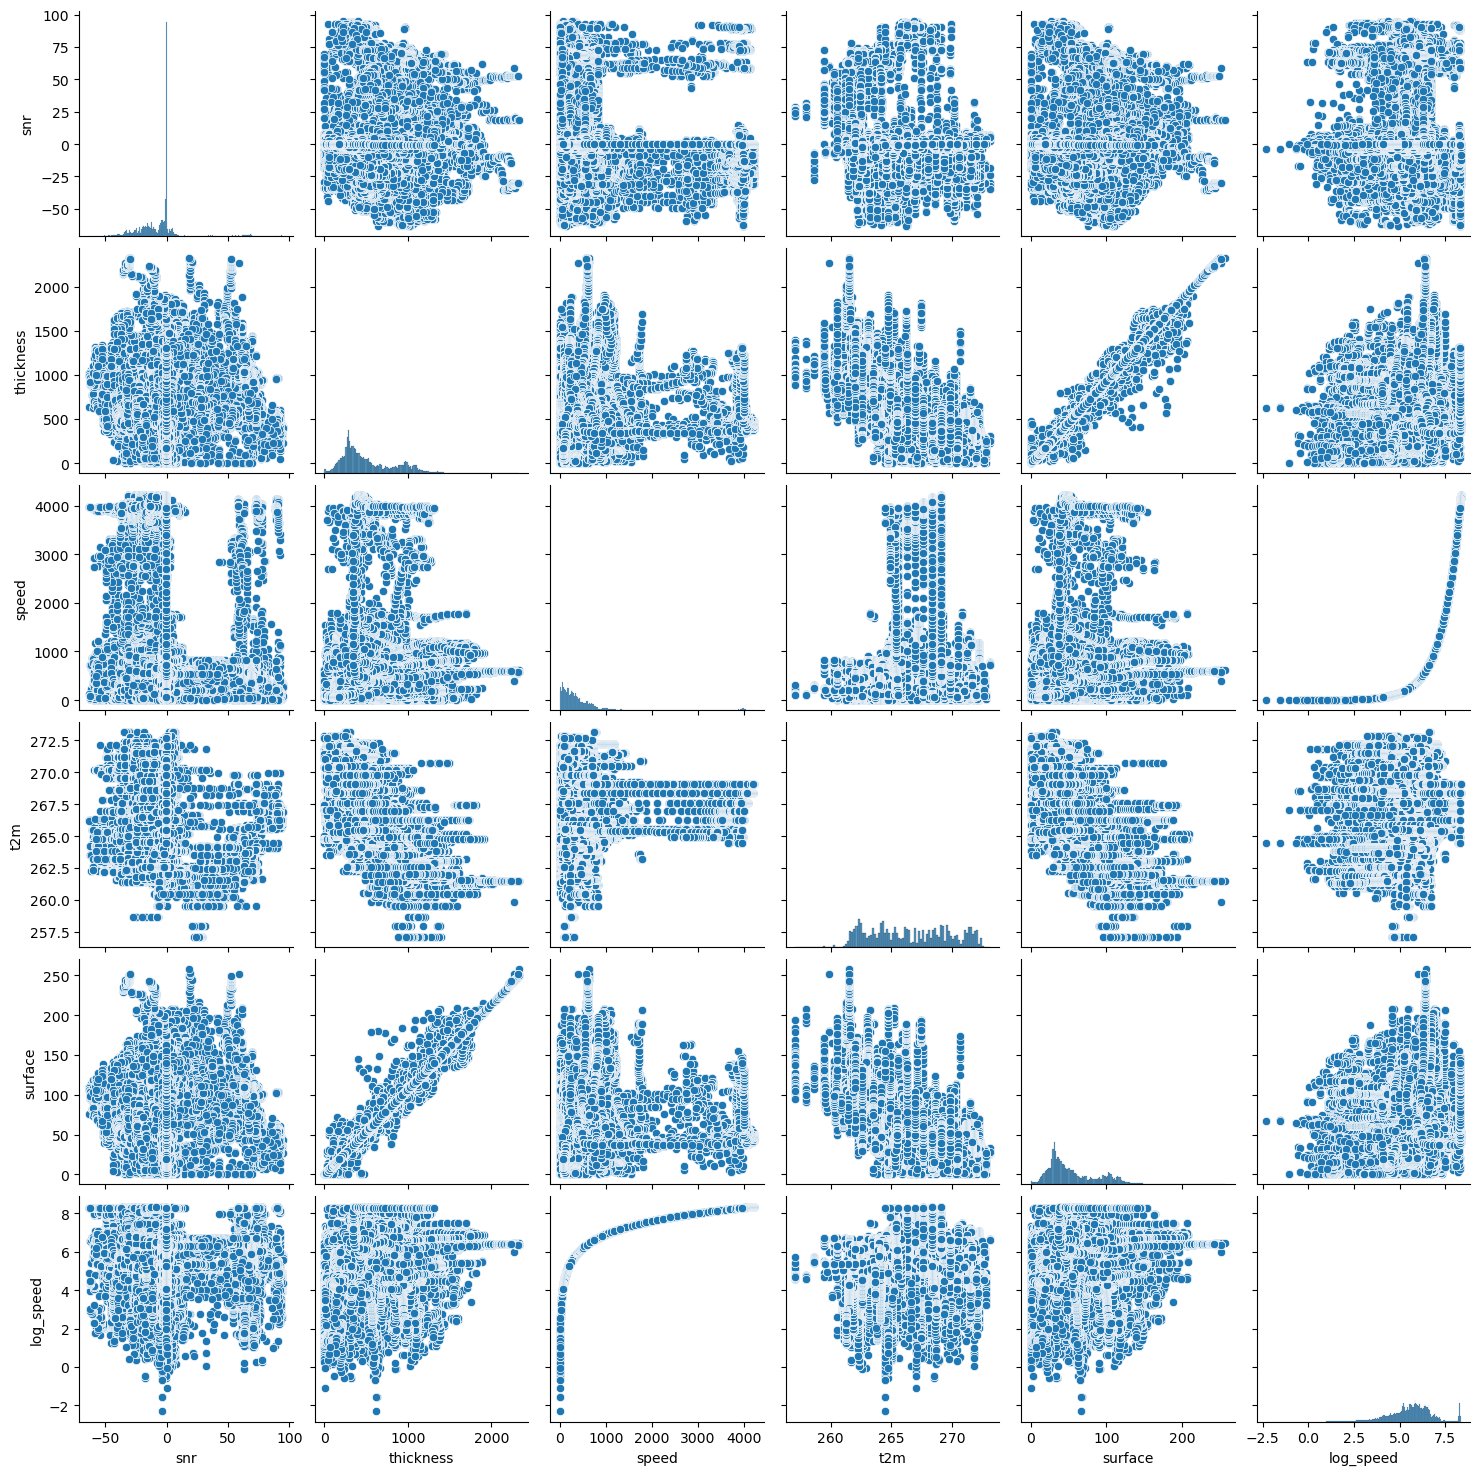

In [47]:
sns.pairplot(floating_df[['snr', 'thickness', 'speed', 
                          't2m','surface', 'log_speed']])

In [48]:
sns.pairplot(full_df[['snr', 'thickness', 'speed', 'surface',
                      't2m', 'bm_mask']], hue='bm_mask')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f037c788e00> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

n < 200 = 961379
n >= 200 = 150102


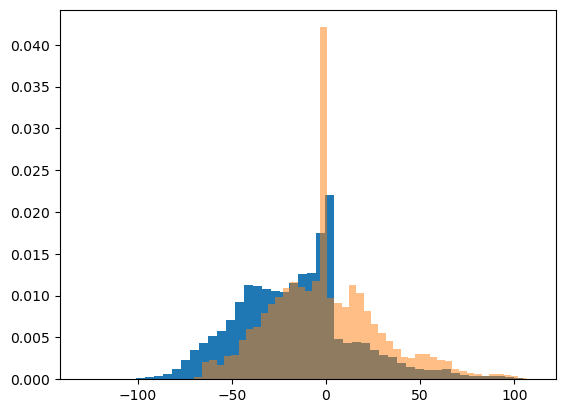

In [54]:
print(f"n < 200 = {len(grounded_df['snr'].loc[grounded_df['speed']<200])}")
print(f"n >= 200 = {len(grounded_df['snr'].loc[grounded_df['speed']>=200])}")
plt.hist(grounded_df['snr'].loc[grounded_df['speed']<200], density=True,
         bins=50)
plt.hist(grounded_df['snr'].loc[grounded_df['speed']>=200], density=True, 
         bins=50, alpha=0.5);

## CRESIS Greenland

In [2]:
data = xr.open_dataset('snr_data_cresis_gis_with_inputs.nc')

In [3]:
cresis_gis_df = data.to_dataframe()

In [4]:
cresis_gis_df.columns

Index(['x', 'y', 'snr', 'source_csv_file', 'source_mat_file', 'source_dir',
       'thickness', 'thickness_err', 'bm_mask', 'surface', 'speed',
       'speed_err', 't2m', 't2m_err'],
      dtype='object')

In [6]:
full_df = cresis_gis_df.loc[(~np.isnan(cresis_gis_df['snr'])) & 
                            (~np.isnan(cresis_gis_df['thickness'])) &
                            (~np.isnan(cresis_gis_df['speed'])) &
                            (~np.isnan(cresis_gis_df['t2m'])) &
                            (~np.isnan(cresis_gis_df['surface'])) &
                            (~np.isnan(cresis_gis_df['bm_mask']))
                           ]

In [7]:
full_df['log_speed'] = np.log(full_df['speed'])

/tmp/ipykernel_4865/395461927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['log_speed'] = np.log(full_df['speed'])


In [8]:
test_df = full_df[~np.isinf(full_df['log_speed']) ]

In [9]:
grounded_df = full_df.loc[full_df['bm_mask']==2]

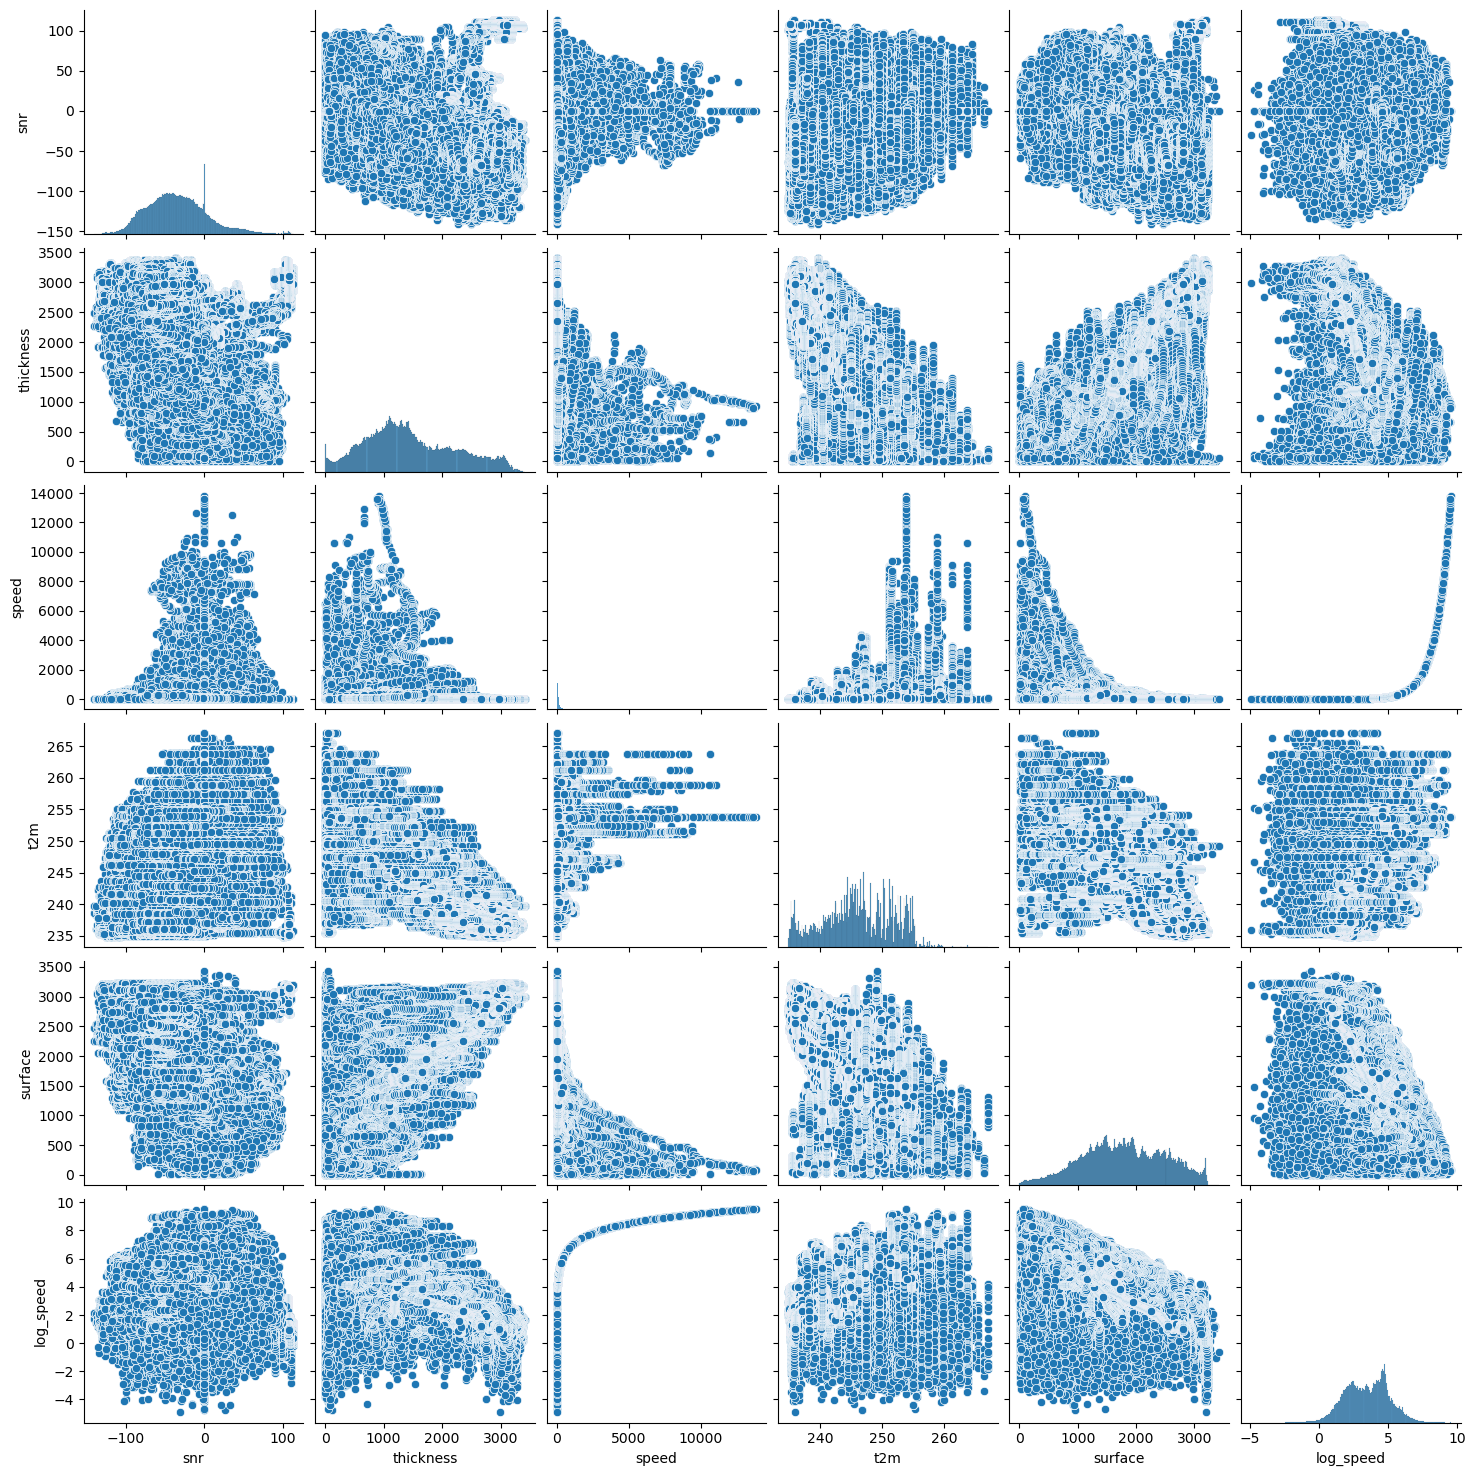

In [10]:
sns.pairplot(grounded_df[['snr', 'thickness', 'speed', 
                          't2m','surface', 'log_speed']])

In [11]:
floating_df = full_df.loc[full_df['bm_mask']==3]

In [12]:
len(floating_df)

13832

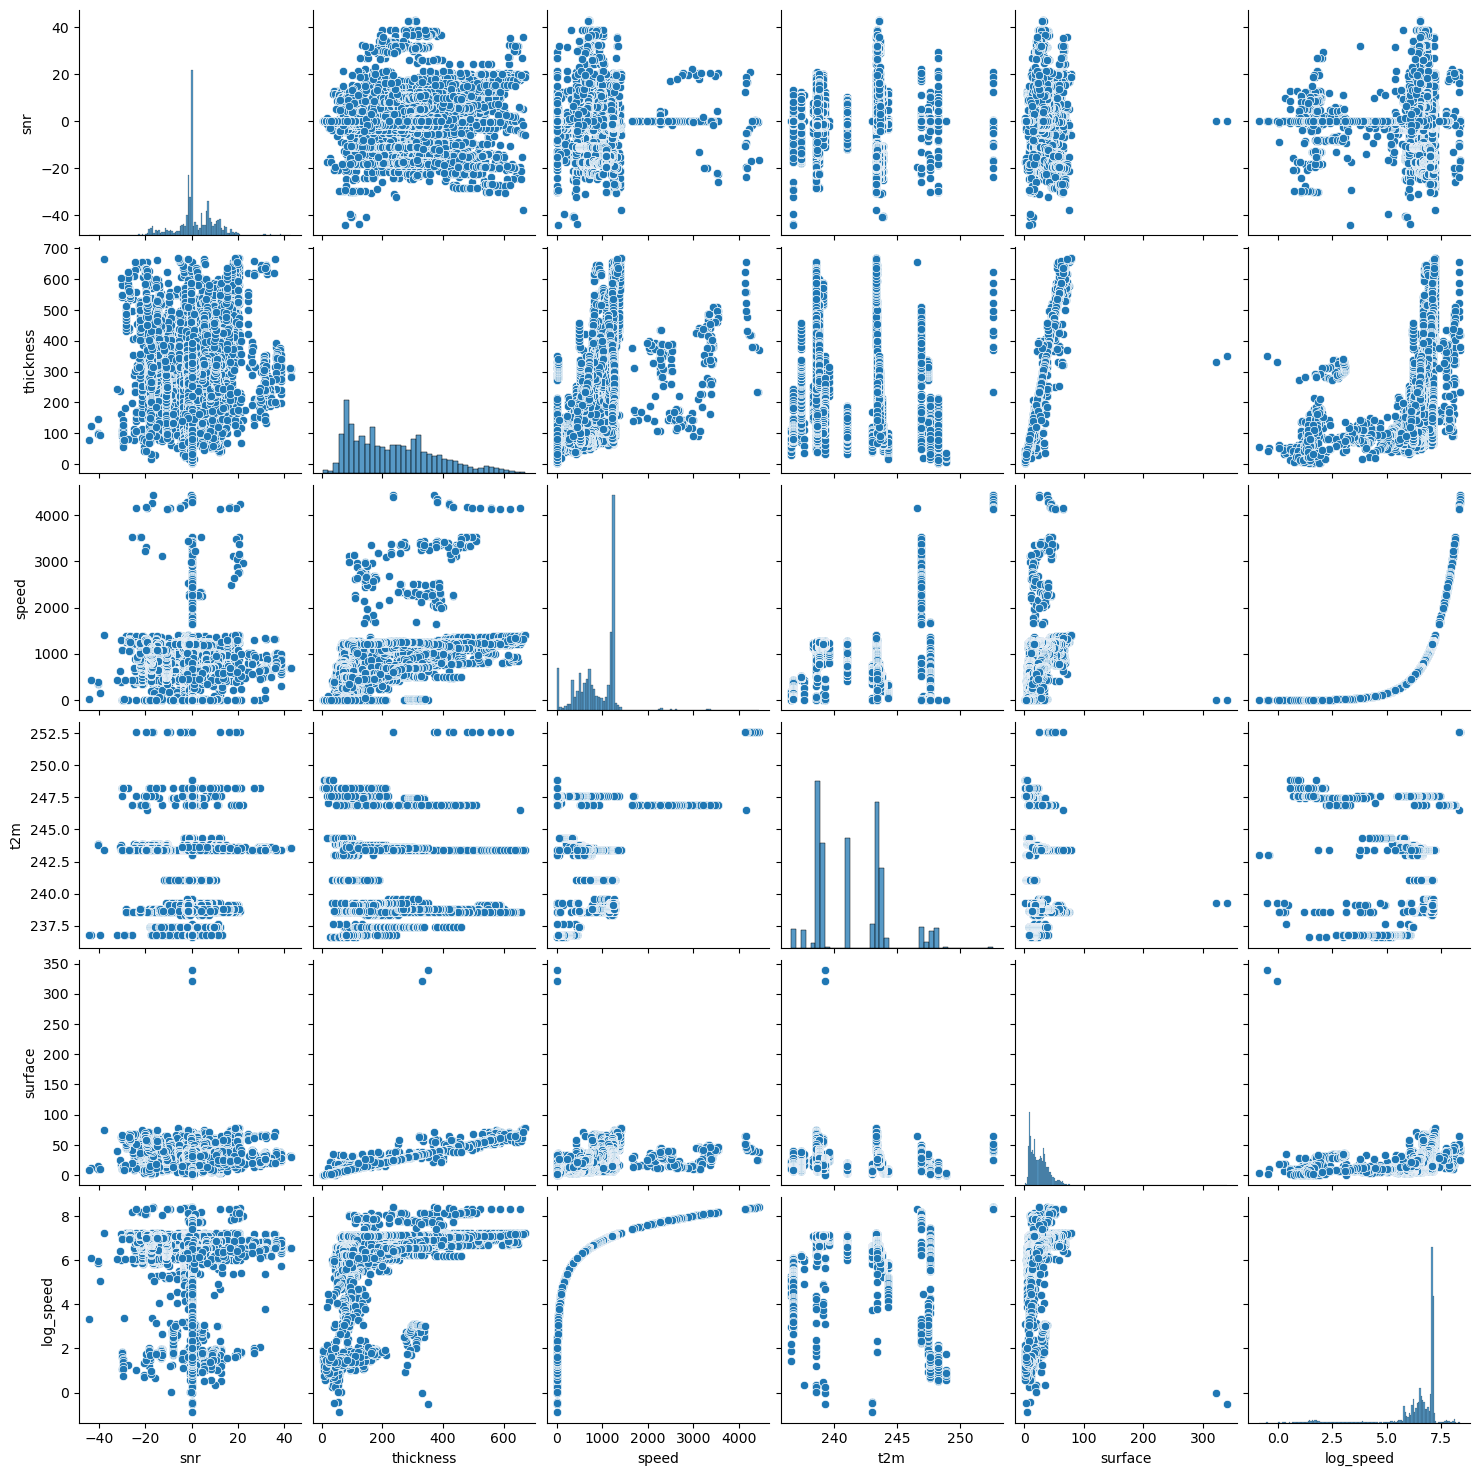

In [13]:
sns.pairplot(floating_df[['snr', 'thickness', 'speed', 
                          't2m','surface', 'log_speed']])